In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [3]:
X,y= make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state =13)

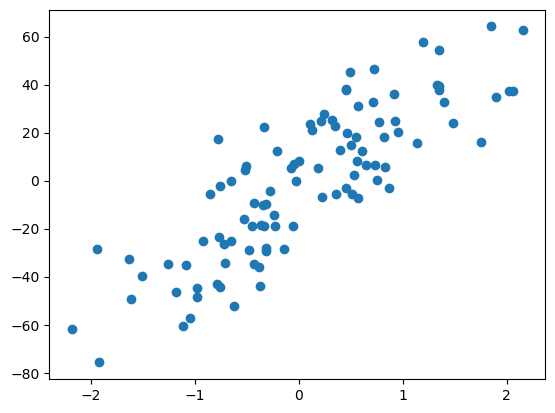

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr= LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5186510664660601

In [11]:
lr.coef_

array([28.12597332])

In [12]:
lr.intercept_

-2.271014426178382

In [13]:
np.mean(cross_val_score(lr, X,y, scoring='r2', cv=10))

0.6375011587464419

In [14]:
class GDRegressor:

    def __init__(self, learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b = self.b -(self.lr*loss_slope_b)
            self.m = self.m -(self.lr*loss_slope_m)
        print(self.b, self.m)

    def predict(self,X):
        return self.m *X + self.b

In [15]:
gd = GDRegressor(0.001, 100)

In [16]:
gd.fit(X_train,y_train)

-2.2710234077993587 28.12598618006269


In [17]:
y_pred1= gd.predict(X_test)

In [18]:
r2_score(y_pred1, y_test)

0.518651438991003

In [19]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [22]:
from matplotlib.animation import FuncAnimation  
import matplotlib.animation as animation

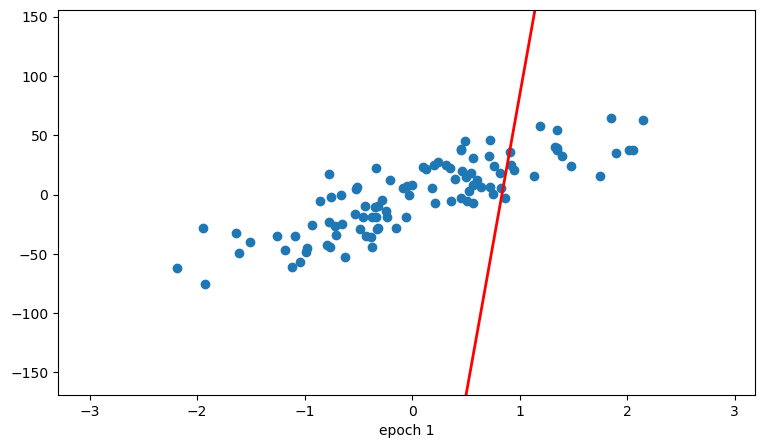

In [23]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

f = r"animation.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)